
### Pre-processing
1. Open the CSV files and delete the first rows (headings) and the unnecessary columns (such as time since start) and move the timestamp col from the end to the first column.
2. Check the timestamps and identify which dataset has the latest start time.
3. Now delete all the rows before that common time from 2 other csv files
4. Check the timestamps and identify which dataset has the earliest stop time.
5. Now delete all the rows after that common time from 2 other csv files

*** make sure the length of the datasets are same

6. Save the sensor data from right wheel as right.csv
7. Save the sensor data from left wheel as left.csv
8. Save the frame data from as frame.csv


In [1]:
# import relevant libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import data from right wheel smartphone
df1 = pd.read_csv('right.csv', header = None)

columns_right = ['timestamp',
           'right_acc_x', 'right_acc_y', 'right_acc_z', 
           'right_gyro_x', 'right_gyro_y', 'right_gyro_z']
df1.columns = columns_right

In [3]:
df1.head()

,timestamp,right_acc_x,right_acc_y,right_acc_z,right_gyro_x,right_gyro_y,right_gyro_z
0,2021-07-08 12:53:27:503,-6.27,-7.52,-0.09,0.00,0.0,0.0
1,2021-07-08 12:53:27:508,-6.27,-7.52,-0.09,0.00,0.0,0.0
2,2021-07-08 12:53:27:514,-6.27,-7.52,-0.09,0.00,0.0,0.0
3,2021-07-08 12:53:27:519,-6.30,-7.58,-0.03,0.01,0.0,0.0
4,2021-07-08 12:53:27:524,-6.30,-7.58,-0.03,0.01,0.0,0.0


In [4]:
df1.right_gyro_z = df1.right_gyro_z.apply(lambda x : (-1)*x)


In [5]:
df1.head()

,timestamp,right_acc_x,right_acc_y,right_acc_z,right_gyro_x,right_gyro_y,right_gyro_z
0,2021-07-08 12:53:27:503,-6.27,-7.52,-0.09,0.00,0.0,-0.0
1,2021-07-08 12:53:27:508,-6.27,-7.52,-0.09,0.00,0.0,-0.0
2,2021-07-08 12:53:27:514,-6.27,-7.52,-0.09,0.00,0.0,-0.0
3,2021-07-08 12:53:27:519,-6.30,-7.58,-0.03,0.01,0.0,-0.0
4,2021-07-08 12:53:27:524,-6.30,-7.58,-0.03,0.01,0.0,-0.0


In [6]:
#Import data from left wheel smartphone
df2 = pd.read_csv('left.csv', header = None)
columns_left = ['timestamp',
            'left_acc_x','left_acc_y','left_acc_z',
            'left_gyro_x', 'left_gyro_y', 'left_gyro_z']
df2.columns = columns_left

In [7]:
df2.head()

,timestamp,left_acc_x,left_acc_y,left_acc_z,left_gyro_x,left_gyro_y,left_gyro_z
0,2021-07-08 12:53:27:503,-5.89,-8.16,-0.03,0.0,0.01,0.02
1,2021-07-08 12:53:27:509,-5.88,-8.15,-0.04,0.0,0.00,0.02
2,2021-07-08 12:53:27:513,-5.88,-8.15,-0.04,0.0,0.00,0.02
3,2021-07-08 12:53:27:518,-5.88,-8.15,-0.04,0.0,0.00,0.02
4,2021-07-08 12:53:27:526,-5.88,-8.15,-0.04,0.0,0.00,0.02


In [8]:
#Import data from frame smartphone
df3 = pd.read_csv('frame.csv', header = None)
columns_frame = ['timestamp',
                'frame_acc_x', 'frame_acc_y', 'frame_acc_z', 
                'frame_gyro_x', 'frame_gyro_y', 'frame_gyro_z']
df3.columns =  columns_frame

In [ ]:
df3.head()

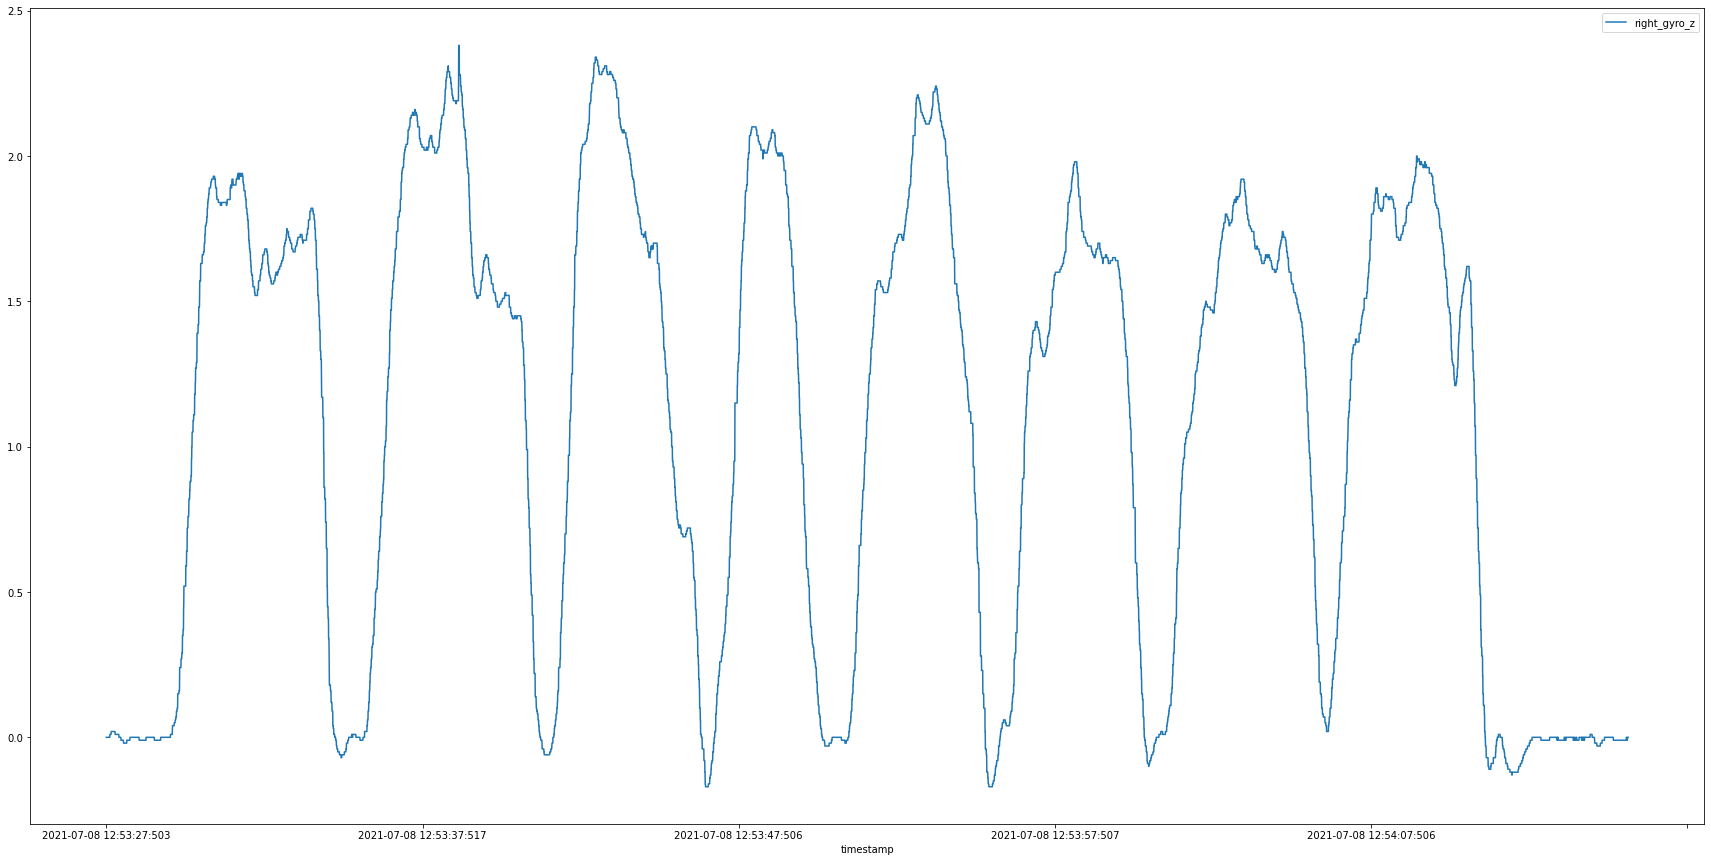

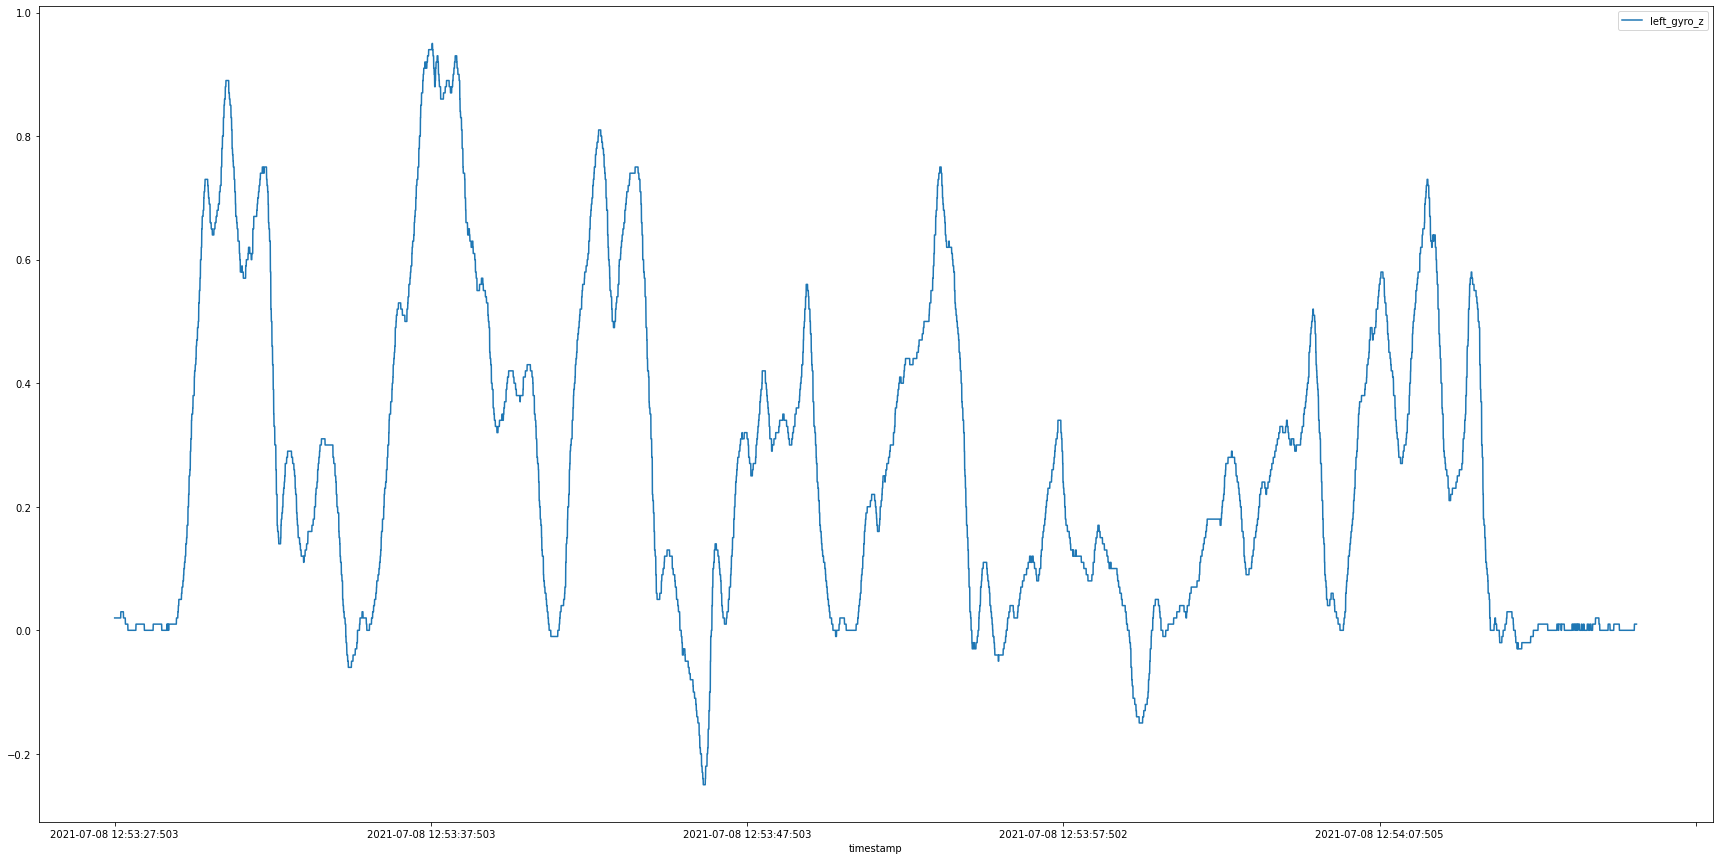

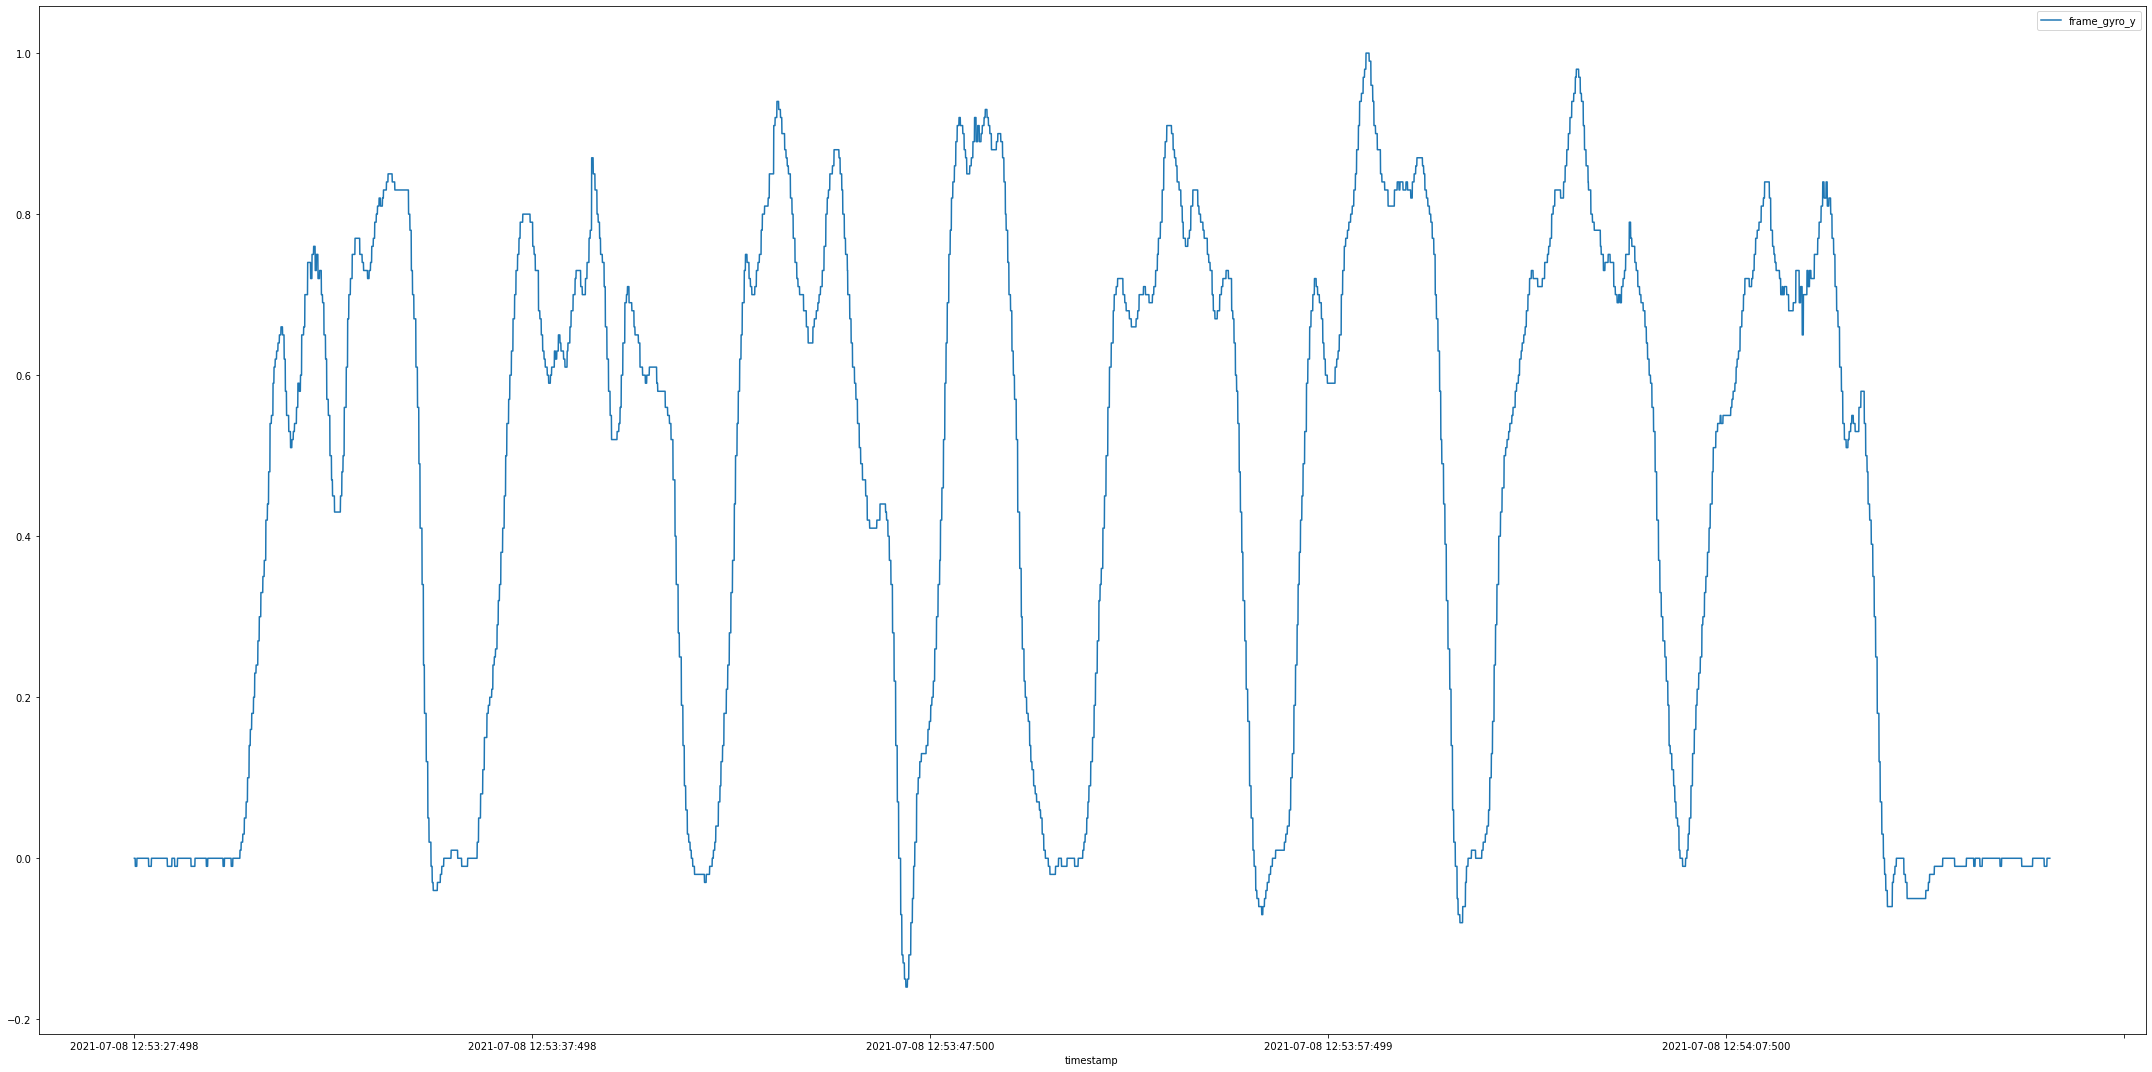

In [10]:
df1.plot(x="timestamp", y=["right_gyro_z"], figsize = (30,15))
df2.plot(x="timestamp", y=["left_gyro_z"], figsize = (30,15))
df3.plot(x="timestamp", y=["frame_gyro_y"], figsize = (30,15))
plt.tight_layout()
plt.show()

In [11]:
###TO DO: Calculate the angular velocity of the frame using angular velocity of the left and right wheels

In [12]:
a = df1.right_gyro_z

In [13]:
b = df2.left_gyro_z

In [50]:
##Parameters
##R= wheel radius
##L=wheelchair width

R = 31/100  
L = 54/100

def angularvel(ang_vel_R, ang_vel_L):
    
    ang_vel_F = (R*(ang_vel_R + ang_vel_L)) / (L)
    
    return ang_vel_F;

In [51]:
c = angularvel(a, b)

In [52]:
print(c)

0       0.011481
1       0.011481
2       0.011481
3       0.011481
4       0.011481
          ...   
9621    0.005741
9622    0.005741
9623    0.005741
9624    0.005741
9625    0.005741
Length: 9626, dtype: float64


In [53]:
df3 = df3.assign(ang_vel_calculated=c)

<AxesSubplot:xlabel='timestamp'>

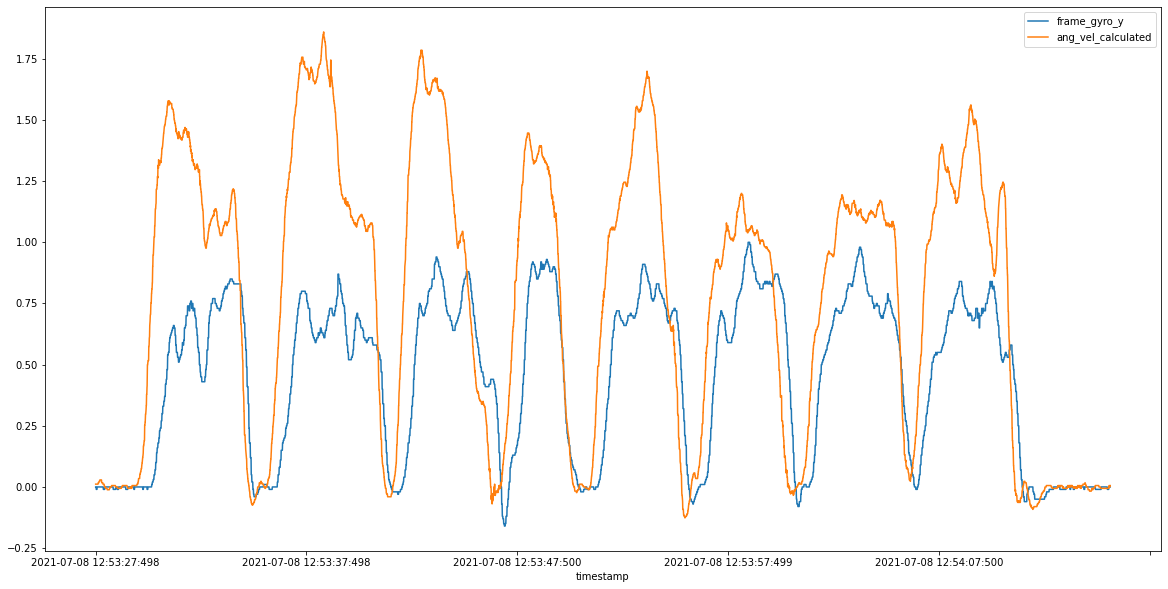

In [54]:
df3.plot(x="timestamp", y=["frame_gyro_y", "ang_vel_calculated"],  figsize = (20,10))